Importar librerias

In [12]:
import numpy as np
import pandas as pd
import time
import parallel_test4 as test_3
import plotMagneticField as hplot

Test de simulacion Espira cuadrada

In [14]:
# Initialize coil parameters
X_coil = test_3.CoilParameters(0.9954953419357395, 0.5864538565842049, 30)
X_coil = test_3.CoilParameters(0.4912769418274396, 0.28493860983556374, 30)

#X_coil = test_3.CoilParameters(0.98083217, 0.95992063, 0.00128399)

# Current coil simulation
I = np.array([1,2,3])
Ax = np.eye(3)
Ay = np.array([[0, -1,  0], [1,  0,  0], [0,  0,  1]])
Az = np.array([[0,  0, -1], [0,  1,  0], [1,  0,  0]])

# X coil simulation
grid_length_size = 0.1
num_seg = 100

In [15]:
##Generar espiras
spire1_x_s, spire2_x_s = test_3.square_spires(Ax, X_coil.h, X_coil.a, num_seg)
spire1_y_s, spire2_y_s = test_3.square_spires(Ay, X_coil.h, X_coil.a, num_seg)
spire1_z_s, spire2_z_s = test_3.square_spires(Az, X_coil.h, X_coil.a, num_seg)

f0 = None
f0 = hplot.plot_spires(f0, spire1_x_s, spire2_x_s, color='black')
f0 = hplot.plot_spires(f0, spire1_y_s, spire2_y_s, color='red')
f0 = hplot.plot_spires(f0, spire1_z_s, spire2_z_s, color='blue')
# Display the final figure
f0.show()

In [16]:
# Generar grid
#X, Y = test_3.generate_range(X_coil.a*3/4, grid_length_size)
#X = np.array([0])  # Convertir a un arreglo de NumPy
#Y = np.array([0])
# Crear X de -a a a
grid_length_size = 0.01
X = np.arange(-X_coil.a, X_coil.a, grid_length_size)

# Crear Y como un arreglo de ceros con el mismo tamaño que X
Y = np.zeros_like(X)

hplot.plot_grid(X, Y, f0)

In [17]:
# Iniciar simulacion
start_time = time.time()
x_coil_results_s = test_3.coil_simulation_1d_sequential(X, Y, X_coil, I[0], spire1_x_s, spire2_x_s, 1 , 40)
# Marcar el tiempo de fin
end_time = time.time()
# Calcular y mostrar el tiempo de ejecución
execution_time = end_time - start_time

# Guardar los resultados en un archivo CSV
output_file = 'x_coil_results_s.csv'
x_coil_results_s.to_csv(output_file, index=False)

print(f"Tiempo de ejecución: {execution_time} segundos")


Simulation Progress:   0%|          | 0/2500 [00:00<?, ?it/s]

Simulation Progress:   3%|▎         | 80/2500 [00:02<01:06, 36.23it/s]

Tiempo de ejecución: 2.2476918697357178 segundos


aa:  0.18000000000000016


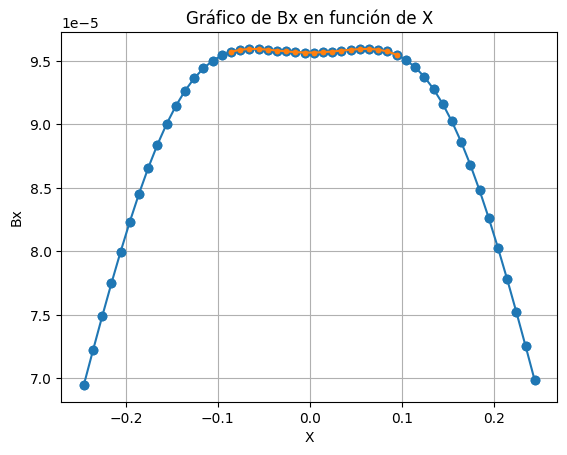

In [18]:
import matplotlib.pyplot as plt
import numpy as np

bx_line = x_coil_results_s[(x_coil_results_s['Y'] == 0) & (x_coil_results_s['Z'] == 0)]

# Calcular el valor máximo de la columna 'Bx'
max_value = bx_line['Bx'].max()

# Calcular el rango del 0.5% del valor máximo
tolerance = 0.005 * max_value
lower_bound = max_value - tolerance
upper_bound = max_value + tolerance

# Filtrar los puntos que estén dentro de ese rango
filtered_points = bx_line[(bx_line['Bx'] >= lower_bound) & (bx_line['Bx'] <= upper_bound)]

#Verificar si los puntos son contiguos
if not filtered_points.empty:
   x_values = filtered_points['X'].sort_values()
   # for i in range(1,len(x_values) - 1) :
   #     print('hola: ', x_values.iloc[i + 1] - x_values.iloc[i])
    
    #print('hola: ',x_values.iloc[0])
   # is_contiguous = all((x_values.iloc[i + 1] - x_values.iloc[i]) <= 2*grid_length_size for i in range(1,len(x_values) - 1))
   # print("Puntos contiguos:", is_contiguous)
else:
    print("No hay puntos en el rango.")

aa = filtered_points['X'].max() - filtered_points['X'].min()

print('aa: ',aa)

x_values = np.array(bx_line['X']).flatten()  # Convertir a un arreglo 1D
bx_values = np.array(bx_line['Bx']).flatten()


x_values1 = np.array(filtered_points['X']).flatten()  # Convertir a un arreglo 1D
bx_values1 = np.array(filtered_points['Bx']).flatten()

plt.plot(x_values, bx_values, marker='o', linestyle='-')
plt.plot(x_values1, bx_values1, marker='.', linestyle='-')
plt.xlabel('X')
plt.ylabel('Bx')
plt.title('Gráfico de Bx en función de X')
plt.grid(True)
plt.show()



In [14]:
# Leer el archivo CSV
#x_coil_results_s = pd.read_csv('/home/iaapp/brayan/Helmholtz/x_coil_results_s.csv')

hplot.simple_3d_surface_plot(x_coil_results_s)

#hplot.plot_magnetic_field(x_coil_results_s)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [8]:

spire1_c, spire2_c = test_3.circular_spires(Ax, X_coil.h, X_coil.a, num_seg)
f1 = hplot.plot_spires(spire1_c, spire2_c, color='black')

In [9]:
# Generar grid
#X, Y = test_3.generate_range(X_coil.a*3/4, grid_length_size)
#hplot.plot_grid(X, Y, f1)

In [10]:
# Generar grid
X, Y = test_3.generate_range(grid_length_size, grid_length_size)
hplot.plot_grid(X, Y, f1)

In [11]:
# Iniciar simulacion
start_time = time.time()
x_coil_results_c = test_3.coil_simulation_1d_sequential(X, Y, X_coil, I[0], spire1_c, spire2_c,1, 1)
# Marcar el tiempo de fin
end_time = time.time()

# Calcular y mostrar el tiempo de ejecución
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

# Guardar los resultados en un archivo CSV
output_file = '/home/iaapp/brayan/Helmholtz/x_coil_results_c.csv'
x_coil_results_c.to_csv(output_file, index=False)

print(f"Tiempo de ejecución: {execution_time} segundos")

Simulation Progress: 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


Tiempo de ejecución: 5.0871686935424805 segundos


OSError: Cannot save file into a non-existent directory: '/home/iaapp/brayan/Helmholtz'

In [ ]:
hplot.simple_3d_surface_plot(x_coil_results_c)

Calculating surface harmonics expansion...
Computing the laplacian matrix...
Computing the mass matrix...
Computing magnetic field coupling matrix, 3184 vertices by 160 target points... took 0.57 seconds.
Computing magnetic field coupling matrix, 3184 vertices by 642 target points... took 2.60 seconds.
Computing the resistance matrix...
Passing problem to solver...
                                     CVXPY                                     
                                     v1.6.0                                    
(CVXPY) Jan 24 11:18:52 AM: Your problem has 100 variables, 4812 constraints, and 0 parameters.
(CVXPY) Jan 24 11:18:52 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jan 24 11:18:52 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jan 24 11:18:52 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jan 24 11:18:52 AM: Your

/home/bespi123/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


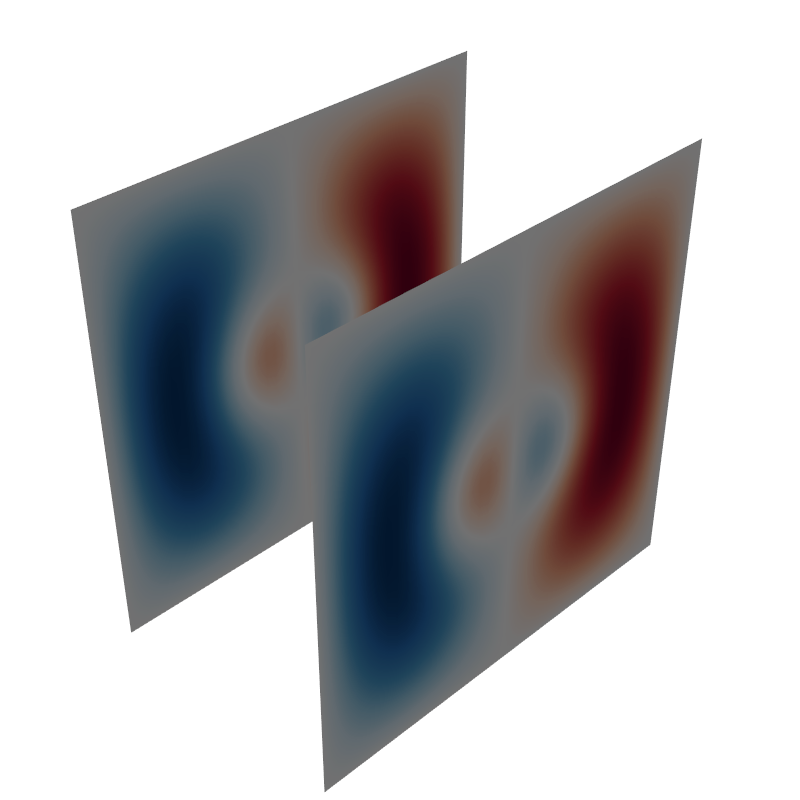

Processing contour, value: -10958744.658541381
Processing contour, value: -8523434.931890346
Processing contour, value: -6088125.205239308
Processing contour, value: -3652815.47858827
Processing contour, value: -1217505.7519372348
Processing contour, value: 1217803.9747138042
Processing contour, value: 3653113.7013648394
Processing contour, value: 6088423.428015878
Processing contour, value: 8523733.154666914
Processing contour, value: 10959042.881317953


/home/bespi123/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


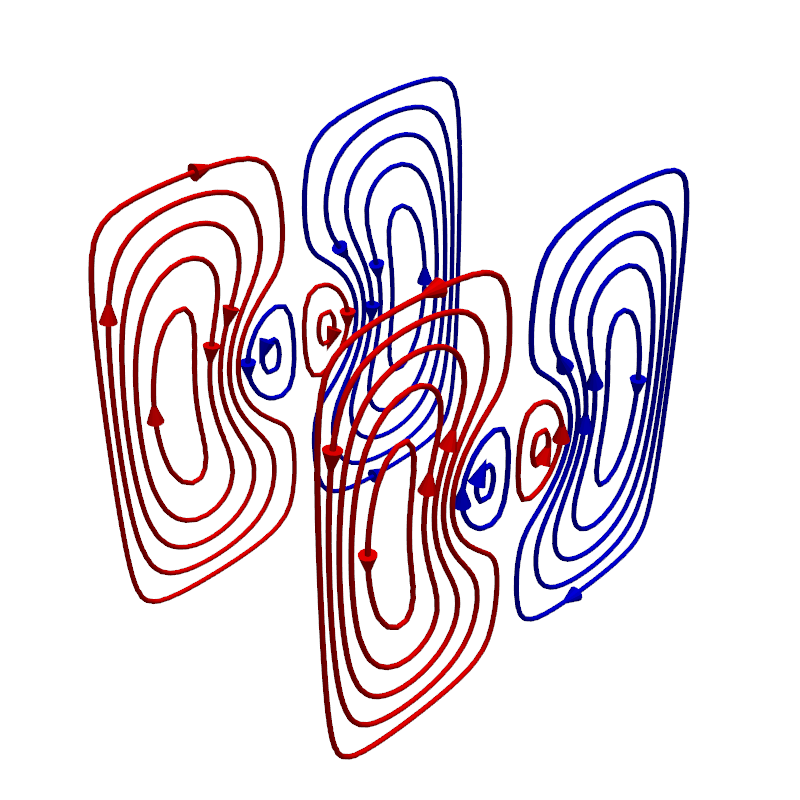

Error tolerances in specification will be ignored when using lsq


/home/bespi123/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


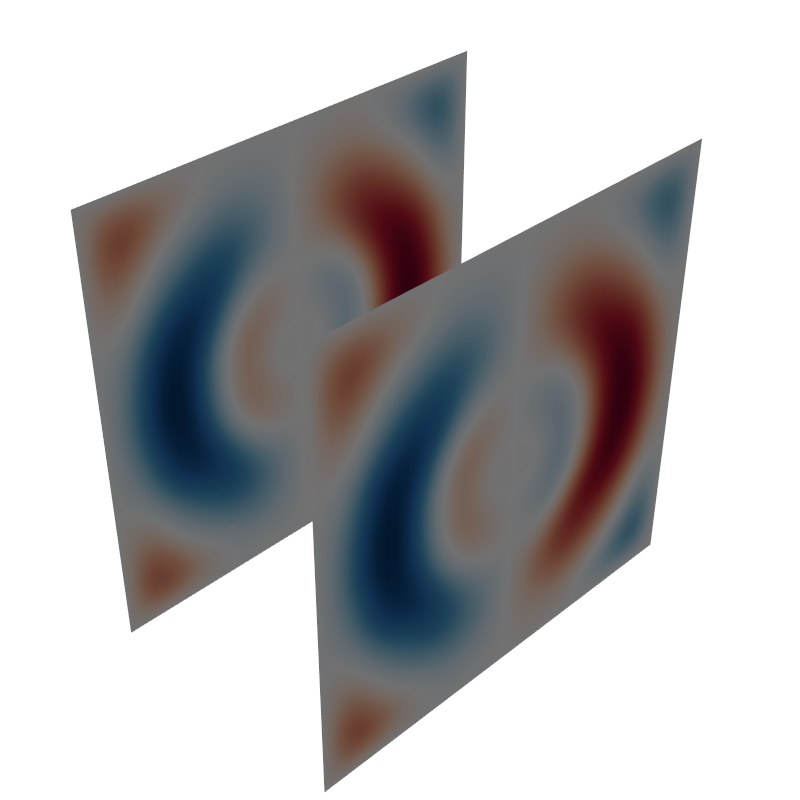

Processing contour, value: -16796733.68070945
Processing contour, value: -13064302.0813559
Processing contour, value: -9331870.482002348
Processing contour, value: -5599438.882648796
Processing contour, value: -1867007.283295244
Processing contour, value: 1865424.316058308
Processing contour, value: 5597855.91541186
Processing contour, value: 9330287.514765412
Processing contour, value: 13062719.114118963
Processing contour, value: 16795150.713472515


/home/bespi123/anaconda3/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


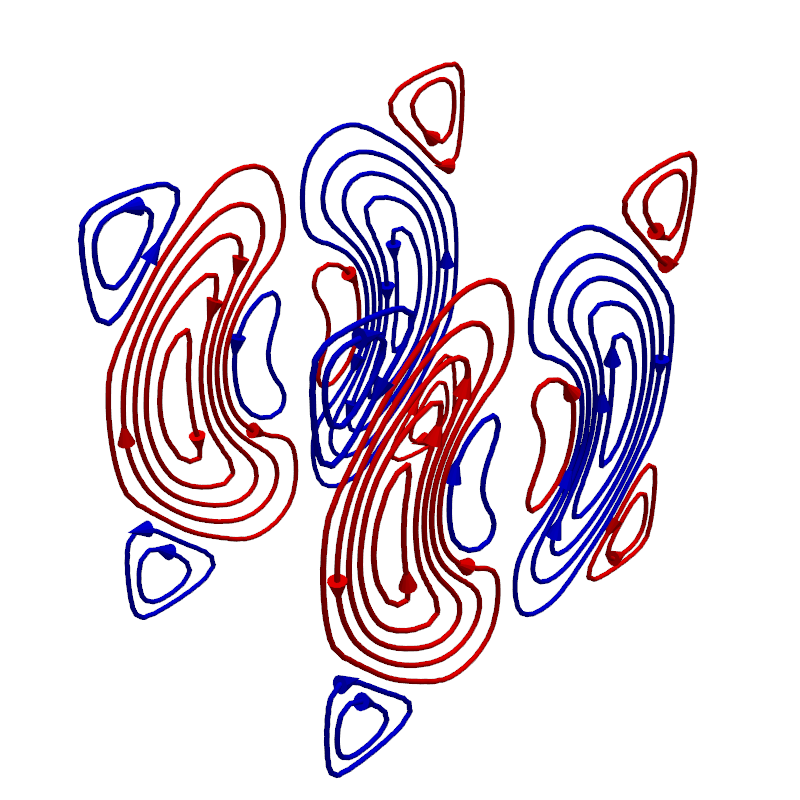

/home/bespi123/anaconda3/lib/python3.9/site-packages/numpy/_core/numeric.py:362: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(a, fill_value, casting='unsafe')


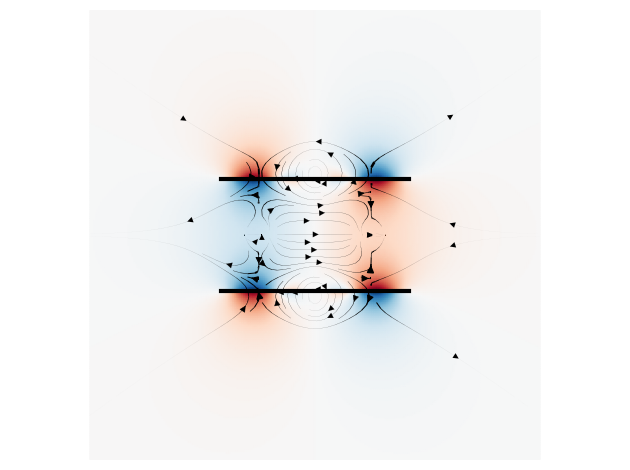

In [4]:
"""
Biplanar coil design
====================

Example showing a basic biplanar coil producing homogeneous field in a target
region between the two coil planes.

"""

import numpy as np
import matplotlib.pyplot as plt

# from mayavi import mlab
import trimesh


from bfieldtools.mesh_conductor import MeshConductor
from bfieldtools.coil_optimize import optimize_streamfunctions
from bfieldtools.viz import plot_cross_section
from bfieldtools.utils import combine_meshes, load_example_mesh


# Load simple plane mesh that is centered on the origin
planemesh = load_example_mesh("10x10_plane_hires")

# Specify coil plane geometry
center_offset = np.array([0, 0, 0])
standoff = np.array([0, 3, 0])

# Create coil plane pairs
coil_plus = trimesh.Trimesh(
    planemesh.vertices + center_offset + standoff, planemesh.faces, process=False
)

coil_minus = trimesh.Trimesh(
    planemesh.vertices + center_offset - standoff, planemesh.faces, process=False
)

joined_planes = combine_meshes((coil_plus, coil_minus))

# Create mesh class object
coil = MeshConductor(
    mesh_obj=joined_planes, fix_normals=True, basis_name="suh", N_suh=100
)

#%%
# Set up target and stray field points

# Here, the target points are on a volumetric grid within a sphere

center = np.array([0, 0, 0])

sidelength = 1.5
n = 8
xx = np.linspace(-sidelength / 2, sidelength / 2, n)
yy = np.linspace(-sidelength / 2, sidelength / 2, n)
zz = np.linspace(-sidelength / 2, sidelength / 2, n)
X, Y, Z = np.meshgrid(xx, yy, zz, indexing="ij")

x = X.ravel()
y = Y.ravel()
z = Z.ravel()

target_points = np.array([x, y, z]).T

# Turn cube into sphere by rejecting points "in the corners"
target_points = (
    target_points[np.linalg.norm(target_points, axis=1) < sidelength / 2] + center
)


# Here, the stray field points are on a spherical surface
stray_radius = 20
stray_points_mesh = trimesh.creation.icosphere(subdivisions=3, radius=stray_radius)
stray_points = stray_points_mesh.vertices + center

n_stray_points = len(stray_points)


#%%
# Create bfield specifications used when optimizing the coil geometry

# The absolute target field amplitude is not of importance,
# and it is scaled to match the C matrix in the optimization function

target_field = np.zeros(target_points.shape)
target_field[:, 0] += 1

target_spec = {
    "coupling": coil.B_coupling(target_points),
    "abs_error": 0.01,
    "target": target_field,
}
stray_spec = {
    "coupling": coil.B_coupling(stray_points),
    "abs_error": 0.01,
    "target": np.zeros((n_stray_points, 3)),
}

bfield_specification = [target_spec, stray_spec]

#%%
## Compute the optimal stream function, either using a numerical solver or regularized least squares

# import mosek

coil.s, prob = optimize_streamfunctions(
    coil,
    [target_spec, stray_spec],
    objective="minimum_ohmic_power",
    # solver="MOSEK",
    # solver_opts={"mosek_params": {mosek.iparam.num_threads: 8}},
)


#%%
# Plot the optimized stream function, then discretize it and plot coil windings and the resultant magnetic field

coil.s.plot()

loops = coil.s.discretize(N_contours=10)

fig = loops.plot_loops()

B_target = loops.magnetic_field(target_points)

fig.add_arrows(target_points, B_target, mag=1e6)

# mlab.quiver3d(*target_points.T, *B_target.T)


#%%
# Lets also do the same coil optimization using regularized least-squares.
# Now we can't specify inequality constraints (e.g. use error margins in the specification).


from bfieldtools.coil_optimize import optimize_lsq

coil.s2 = optimize_lsq(
    coil, [target_spec, stray_spec], objective="minimum_ohmic_power", reg=1e6
)


#%%
# Plot the optimized stream function, then discretize it and plot coil windings and the resultant magnetic field

coil.s2.plot()

loops2 = coil.s2.discretize(N_contours=10)

fig = loops2.plot_loops()

B_target = loops2.magnetic_field(target_points)
fig.add_arrows(target_points, B_target, mag=1e6)


#%%
# Plot cross-section of magnetic field and magnetic potential of the discretized loops

x = y = np.linspace(-12, 12, 250)
X, Y = np.meshgrid(x, y, indexing="ij")


points = np.zeros((X.flatten().shape[0], 3))
points[:, 0] = X.flatten()
points[:, 1] = Y.flatten()

B = loops2.magnetic_field(points)
U = loops2.scalar_potential(points)

U = U.reshape(x.shape[0], y.shape[0])
B = B.T[:2].reshape(2, x.shape[0], y.shape[0])

lw = np.sqrt(B[0] ** 2 + B[1] ** 2)

lw = 2 * lw / np.max(lw)

plot_cross_section(X, Y, U, log=False, contours=False)

seed_points = points[:, :2] * 0.3

plt.streamplot(
    x,
    y,
    B[0],
    B[1],
    density=2,
    linewidth=lw,
    color="k",
    integration_direction="both",
    start_points=seed_points,
)
plt.axis("equal")
plt.axis("off")

plt.plot([-5, 5], [-3, -3], "k", linewidth=3, alpha=1)
plt.plot([-5, 5], [3, 3], "k", linewidth=3, alpha=1)

plt.tight_layout()

In [8]:
print(planemesh)

<trimesh.Trimesh(vertices.shape=(1592, 3), faces.shape=(3038, 3))>


In [10]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from bfieldtools.mesh_conductor import MeshConductor
from bfieldtools.coil_optimize import optimize_streamfunctions
from bfieldtools.utils import combine_meshes

# Generate circular coil meshes
def create_circular_coil(radius, num_points, center):
    theta = np.linspace(0, 2 * np.pi, num_points)
    vertices = np.c_[radius * np.cos(theta), radius * np.sin(theta), np.zeros_like(theta)]
    vertices += center  # Offset to place coil correctly
    faces = np.array([[i, (i + 1) % num_points, num_points - 1] for i in range(num_points - 1)])
    return trimesh.Trimesh(vertices, faces, process=False)

# Define parameters for Helmholtz coils
radius = 5  # Coil radius
num_points = 100  # Number of points for coil discretization
coil_separation = radius  # Separation between coils

# Create two coils
coil_1 = create_circular_coil(radius, num_points, center=np.array([0, 0, -coil_separation / 2]))
coil_2 = create_circular_coil(radius, num_points, center=np.array([0, 0, +coil_separation / 2]))
combined_mesh = combine_meshes((coil_1, coil_2))

# Create the coil conductor
coil = MeshConductor(mesh_obj=combined_mesh, fix_normals=True)

# Set up target points along the Z-axis
z = np.linspace(-10, 10, 200)  # Axis along Z
target_points = np.c_[np.zeros_like(z), np.zeros_like(z), z]  # Points along Z-axis

# Define the target field and optimize the stream function
target_field = np.zeros(target_points.shape)
target_field[:, 2] += 1  # Target field in the Z-direction
target_spec = {
    "coupling": coil.B_coupling(target_points),
    "abs_error": 0.01,
    "target": target_field,
}

# Optimize the stream function
coil.s, _ = optimize_streamfunctions(coil, [target_spec], objective="minimum_ohmic_power")

# Discretize the stream function into loops
loops = coil.s.discretize(N_contours=10)

# Calculate the magnetic field at target points
B_target = loops.magnetic_field(target_points)

# Plot the magnetic field along the Z-axis
plt.plot(z, B_target[:, 2])  # Z-component of the field
plt.xlabel("Z-axis (distance from center)")
plt.ylabel("Magnetic Field (T)")
plt.title("Magnetic Field Along the Axis of Helmholtz Coils")
plt.grid()
plt.show()

Computing magnetic field coupling matrix, 200 vertices by 200 target points... took 0.03 seconds.
Computing the resistance matrix...


/home/bespi123/anaconda3/lib/python3.9/site-packages/bfieldtools/mesh_calculus.py:165: RuntimeWarning: divide by zero encountered in divide
  tri_data = edges / (2 * mesh.area_faces[:, None, None])
/home/bespi123/anaconda3/lib/python3.9/site-packages/bfieldtools/mesh_calculus.py:165: RuntimeWarning: invalid value encountered in divide
  tri_data = edges / (2 * mesh.area_faces[:, None, None])
/home/bespi123/anaconda3/lib/python3.9/site-packages/bfieldtools/mesh_calculus.py:73: RuntimeWarning: divide by zero encountered in divide
  -0.5
/home/bespi123/anaconda3/lib/python3.9/site-packages/bfieldtools/mesh_calculus.py:73: RuntimeWarning: invalid value encountered in divide
  -0.5


ValueError: array must not contain infs or NaNs

In [9]:
print(coil_1)

<trimesh.Trimesh(vertices.shape=(100, 3), faces.shape=(99, 3))>
